# Exercise 4 : Linear Regression

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem 1 : Predicting SalePrice using GrLivArea

In [2]:
houseData = pd.read_csv('train.csv')
# houseData

a) Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship.

In [3]:
salevarea = pd.DataFrame(houseData[['SalePrice', 'GrLivArea']])
salevarea.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


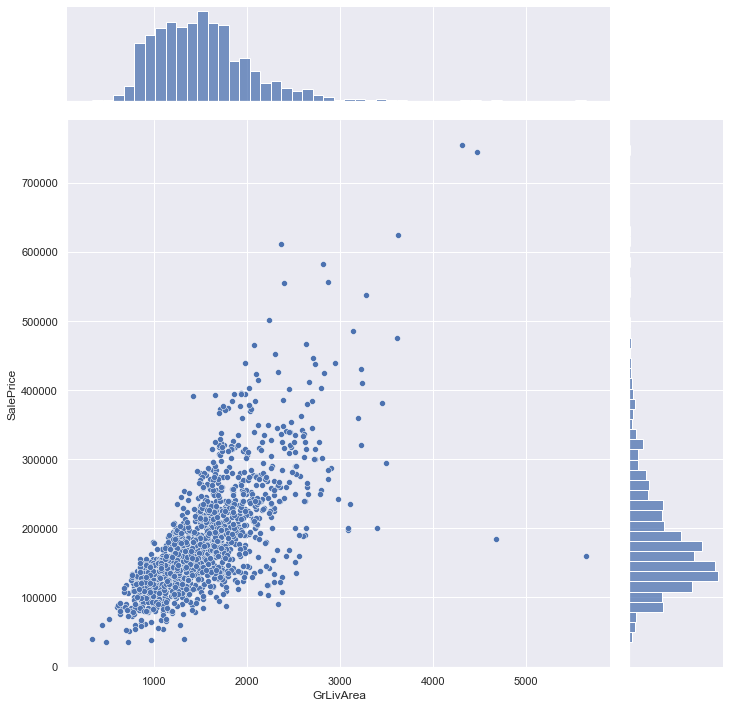

In [4]:
sb.jointplot(data = salevarea, x = "GrLivArea", y = "SalePrice", height = 10)

b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [5]:
salevarea.corr()

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


In [6]:
print("The correlation coefficient is 0.708624")

The correlation coefficient is 0.708624


c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.linear_model import LinearRegression

d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [8]:
# houseData

In [9]:
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(houseData, test_size = 0.2465)

In [10]:
# trainData

In [11]:
# testData

e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea.
>  Regression Problem : SalePrice = $m$ $\times$ GrLivArea + $c$

In [12]:
sale_train = pd.DataFrame(trainData['SalePrice'])
grliv_train = pd.DataFrame(trainData['GrLivArea'])

In [13]:
linreg = LinearRegression()
linreg.fit(grliv_train, sale_train)

LinearRegression()

f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot

In [14]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [19562.1766234]
Coefficients 	: a =  [[105.72706247]]


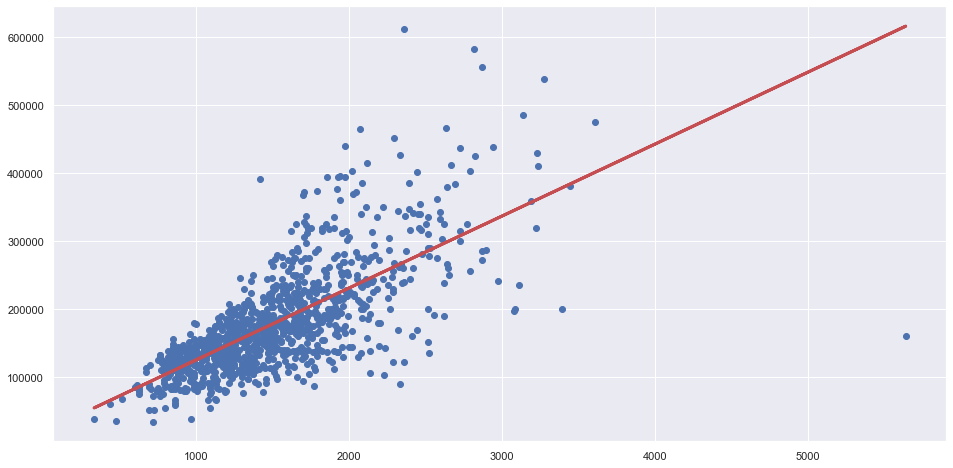

In [15]:
regline_x = grliv_train
regline_y = linreg.intercept_ + linreg.coef_ * grliv_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(grliv_train, sale_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model

In [16]:
sale_train_pred = linreg.predict(grliv_train)

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(grliv_train, sale_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(sale_train, sale_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
# print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5043611884807064
Mean Squared Error (MSE) 	: 2924227408.0888557


h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.

In [17]:
# # Predict Total values corresponding to HP Test
# total_test_pred = linreg.predict(hp_test)

# # Plot the Predictions
# f = plt.figure(figsize=(16, 8))
# plt.scatter(hp_test, total_test, color = "green")
# plt.scatter(hp_test, total_test_pred, color = "red")
# plt.show()

In [18]:
sale_test = pd.DataFrame(testData['SalePrice'])
grliv_test = pd.DataFrame(testData['GrLivArea'])

In [19]:
saleprice_test_pred = linreg.predict(grliv_test)

i) Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy.

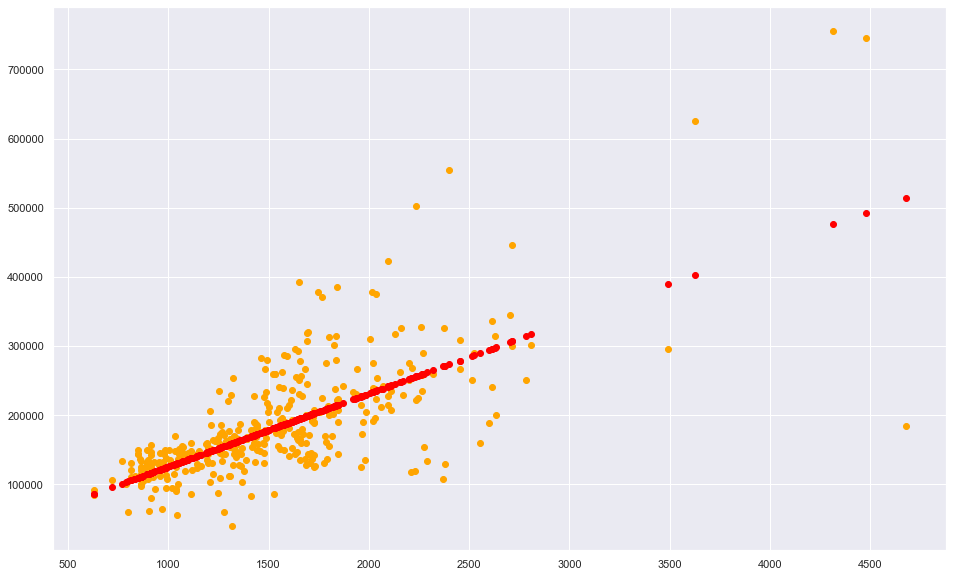

In [20]:


# Plot the Predictions

f = plt.figure(figsize=(16, 10))
plt.scatter(grliv_test, sale_test, color = "orange")
plt.scatter(grliv_test, saleprice_test_pred, color = "red")
plt.show()

j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

In [21]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(grliv_test, sale_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(sale_test, saleprice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.4923339578923911
Mean Squared Error (MSE) 	: 3806083646.111685
Root Mean Squared Error (RMSE) 	: 61693.46518158698


## Problem 2 : Predicting SalePrice using Other Variables
Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” oneby-one to perform individual Linear Regressions and obtain individual univariate Linear Regression Models in each case.

In [22]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [20839.87803749]
Coefficients of Regression 	: a =  [[105.62314677]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49313899888260904
Mean Squared Error (MSE) 	: 3309641236.1143227

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5329425920676225
Mean Squared Error (MSE) 	: 2632957238.6152706



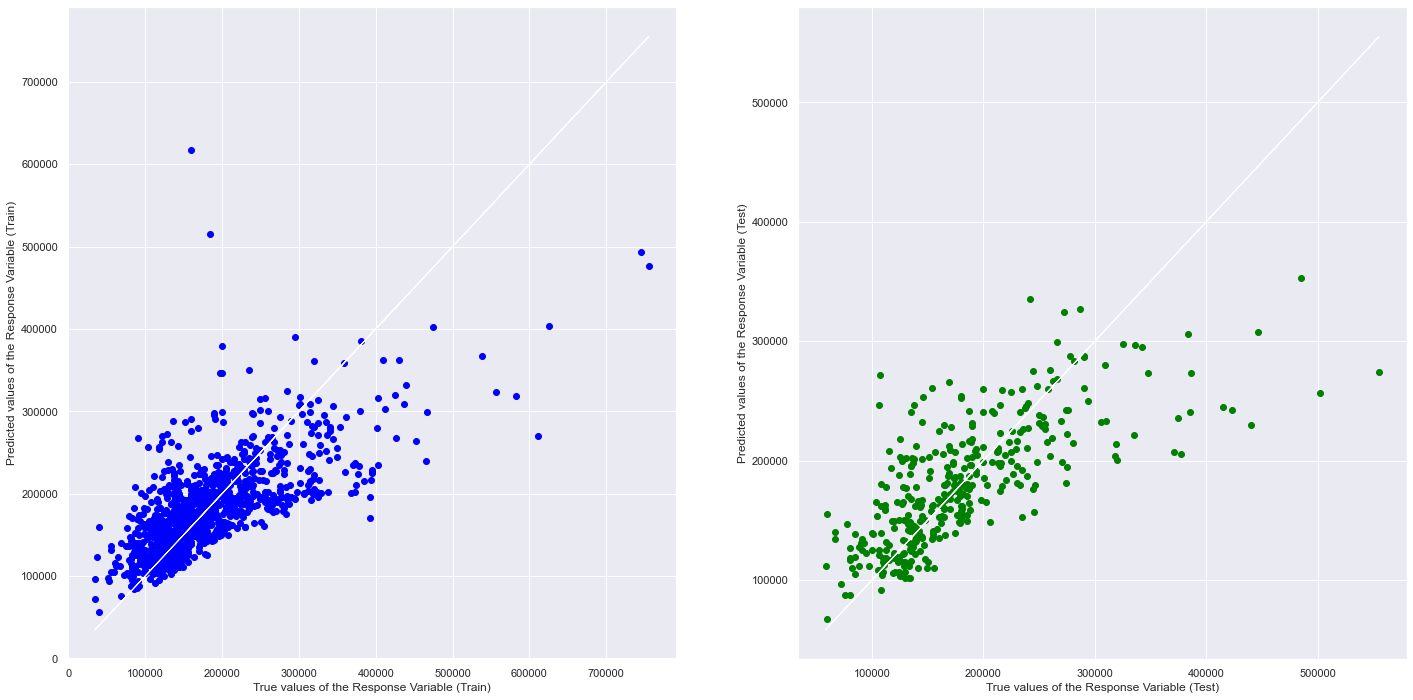

In [23]:
sale = pd.DataFrame(houseData['SalePrice'])   # Response
grliv = pd.DataFrame(houseData['GrLivArea'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(grliv, sale, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [161966.76187262]
Coefficients of Regression 	: a =  [[1.74866169]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.05661812331444538
Mean Squared Error (MSE) 	: 5512632336.216257

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.09193194198696708
Mean Squared Error (MSE) 	: 6983533198.606552



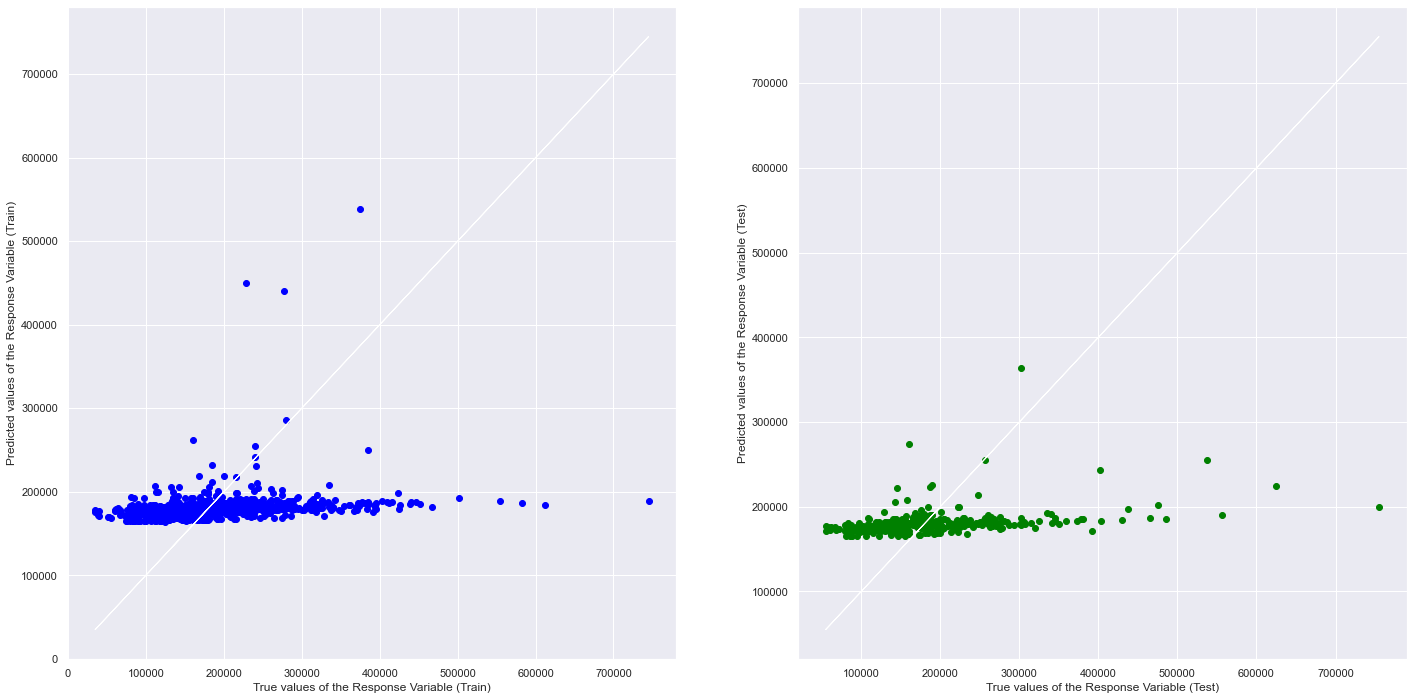

In [24]:
sale = pd.DataFrame(houseData['SalePrice'])   # Response
lotarea = pd.DataFrame(houseData['LotArea'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(lotarea, sale, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [66836.21353969]
Coefficients of Regression 	: a =  [[107.99036588]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3544145561832288
Mean Squared Error (MSE) 	: 4178151642.583294

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44886807029897624
Mean Squared Error (MSE) 	: 3202683975.4798703



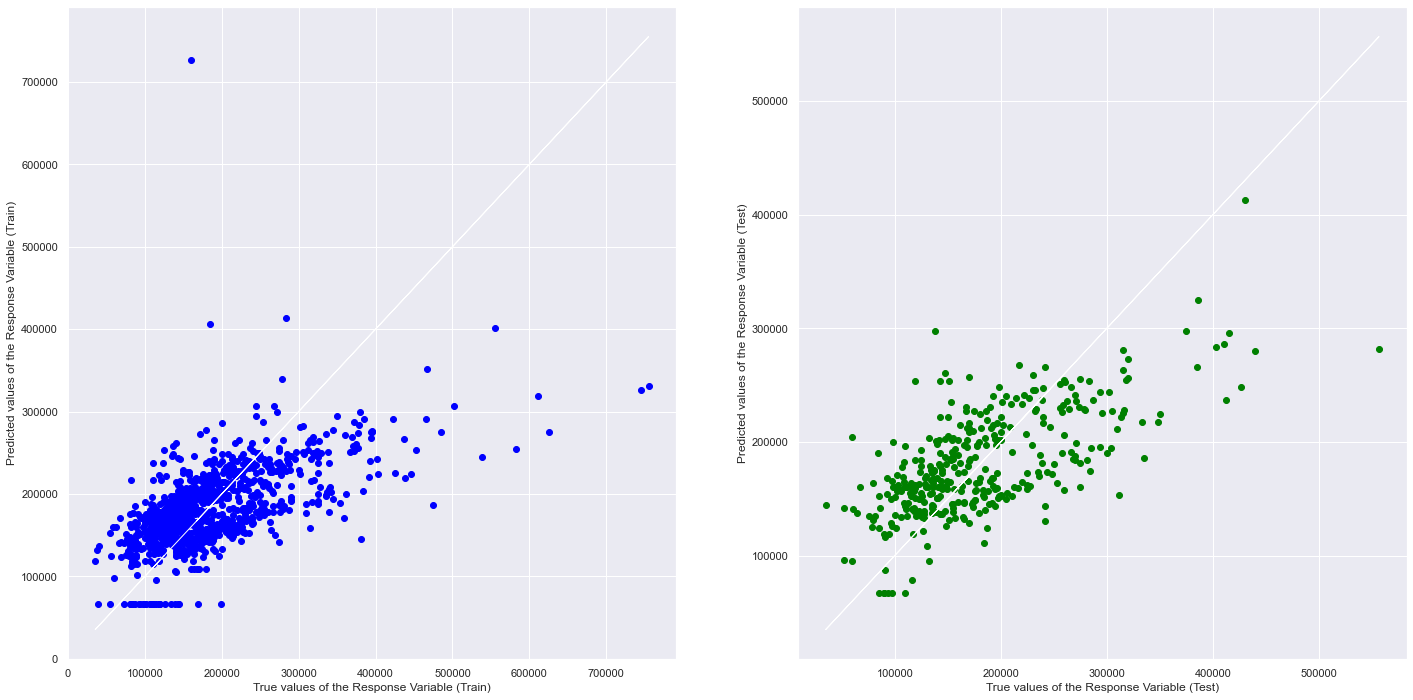

In [25]:
sale = pd.DataFrame(houseData['SalePrice'])   # Response
bsmtsf = pd.DataFrame(houseData['TotalBsmtSF'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(bsmtsf, sale, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [73331.49839765]
Coefficients of Regression 	: a =  [[230.26318283]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3691427045402985
Mean Squared Error (MSE) 	: 4168719512.193131

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.45749877219074464
Mean Squared Error (MSE) 	: 2923360558.698156



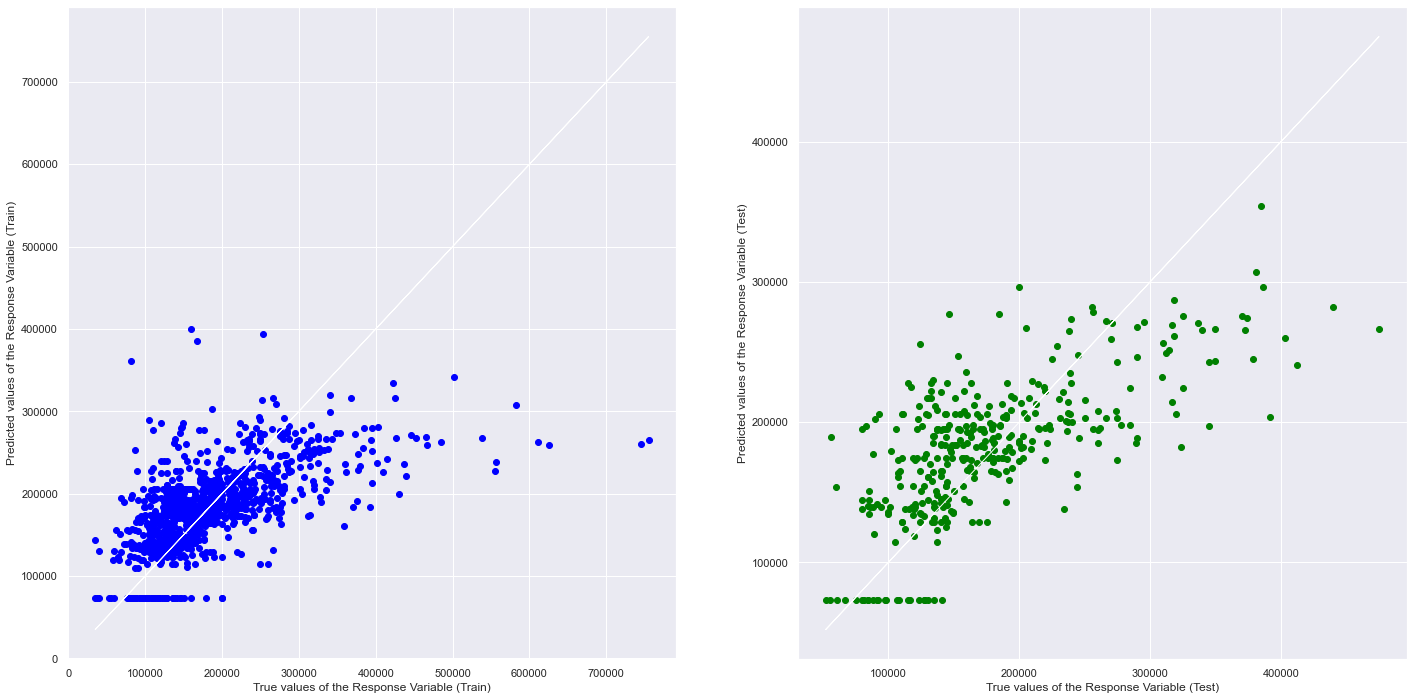

In [26]:
sale = pd.DataFrame(houseData['SalePrice'])   # Response
garage = pd.DataFrame(houseData['GarageArea'])         # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(garage, sale, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Problem 3 : Best Uni-Variate Model to Predict SalePrice
Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data,
the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”

The model that plots "Sale Price" against "GrLivArea" has the highest Explained Variance and the lowest mean squared error when using the train data compared to other models using "totalBSMTsf", "GarageArea", "LotArea". In addition to that, this model also has the highest Explained Variance and the lowest mean squared error when predicting Test Data. Thus, it has the highest accuracy of prediction on Test Data out of all the models, and is the best to predict "Sale Price". 